In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [27]:
data = pd.read_csv('./data/day.csv', delimiter=',')
data = data.drop(['dteday'], axis=1)
data = data.drop(['instant'], axis=1)
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [28]:
needed_columns = ['hum', 'windspeed', 'temp', 'cnt']
data = data[needed_columns]

x = data.drop(['cnt'], axis=1)
y = data['cnt']

# Сплит данных (80% - обучающие данные, 30% - тестовые данные)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [29]:
model = KNeighborsRegressor(4)

In [30]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [31]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

accuracy = 100 - MAPE(Y_test, Y_pred)

In [32]:
print('Accuracy of KNN model: {:0.2f}%.'.format(accuracy))

Accuracy of KNN model: 63.15%.


In [48]:
k_values = list(range(1, 11))
accuracies = []

In [49]:
for k in k_values:
    model = KNeighborsRegressor(k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = 100 - MAPE(Y_test, Y_pred)
    accuracies.append(accuracy)

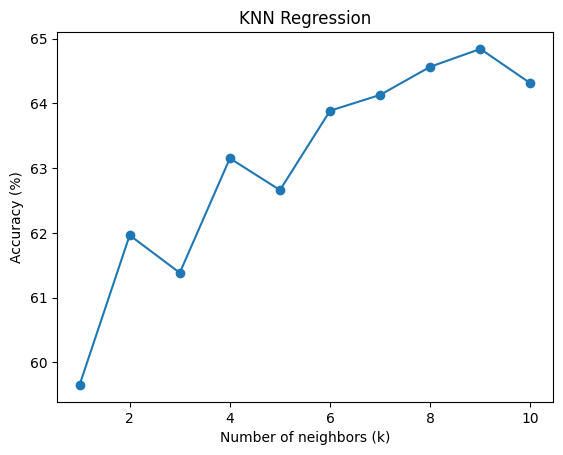

In [51]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('KNN Regression')
plt.show()